# Aim

1. This notebook is aimed towards doing univariate analysis of variables



In [43]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

In [2]:
DATA_ROOT = "../data"

In [3]:
df = pd.read_csv(f"{DATA_ROOT}/eda/clean-data.csv")

df.head(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day


In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Number',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Univariate analysis

## ID

In [13]:
# checking if all ids are unique

df["ID"].nunique() == df.shape[0]

True

## Source

In [14]:
# checking contribution of each source
df["Source"].value_counts()

MapQuest         2414301
Bing             1034799
MapQuest-Bing      64517
Name: Source, dtype: int64

## TMC

In [61]:
print(f"""There are {df["TMC"].nunique()} unique TMCs""")

There are 22 unique TMCs


In [21]:
df["TMC"].value_counts()

201.0    2080341
0.0      1034799
241.0     249852
245.0      40338
229.0      22932
203.0      17639
222.0      13154
244.0      12185
406.0      11109
246.0       7118
343.0       6930
202.0       6298
247.0       4775
236.0       2121
206.0       1274
248.0       1025
339.0        920
341.0        592
336.0         89
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

1. We can see that TMC `201.0` has highest number of occurences
1. followed by `241.0`, `245.0`
1. `0.0` is imputed value to handle nans (ignoring this in the order)

## Severity

In [40]:
_ = (
    df["Severity"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Severity", "Severity": "counts"})
)
display(_)

,Severity,counts
0,2,2373210
1,3,998913
2,4,112320
3,1,29174


1. We can see that there is an imbalance within the classes that need to be predicted
1. accidents with severity `2` have max occurences
1. whereas minor accidents with severity `1` have least occurences
1. accidents with severity `4` have last but second number of occurences

## Distance(mi)

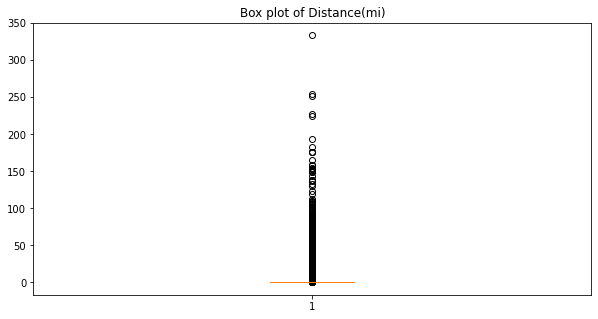

In [47]:
plt.figure(figsize=[10, 5])
plt.title("Box plot of Distance(mi)")
plt.boxplot(df["Distance(mi)"].values)
plt.show()

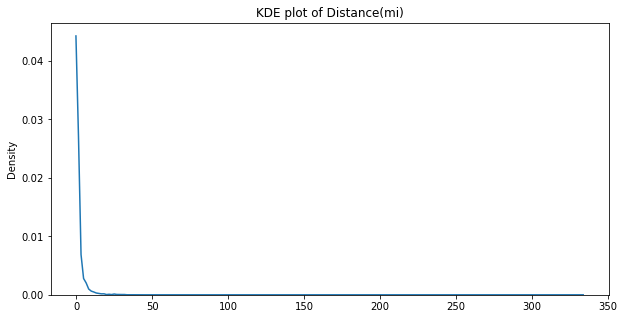

In [48]:
plt.figure(figsize=[10, 5])
plt.title("KDE plot of Distance(mi)")
sns.kdeplot(df["Distance(mi)"].values)
plt.show()

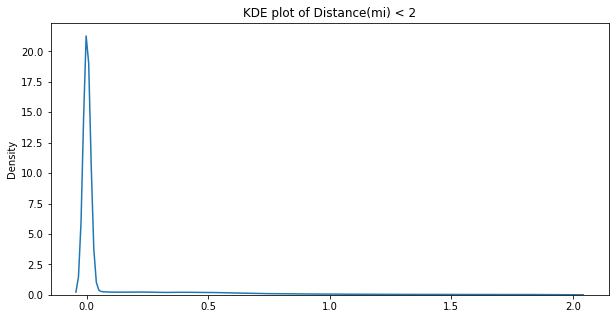

In [117]:
plt.figure(figsize=[10, 5])
plt.title("KDE plot of Distance(mi) < 2")
sns.kdeplot(df[df["Distance(mi)"] < 2]["Distance(mi)"].values)
plt.show()

1. from both Boxplot and KDE plot we can observe that `Distance(mi)` follows a long tailed distribution
1. we can see majority of values are densely occuring near 0
1. meaning majority of the accidents are affecting close to 0 miles of road

## City

In [82]:
print(f"""There are {df["City"].nunique()} unique cities in the dataset""")

There are 11895 unique cities in the dataset


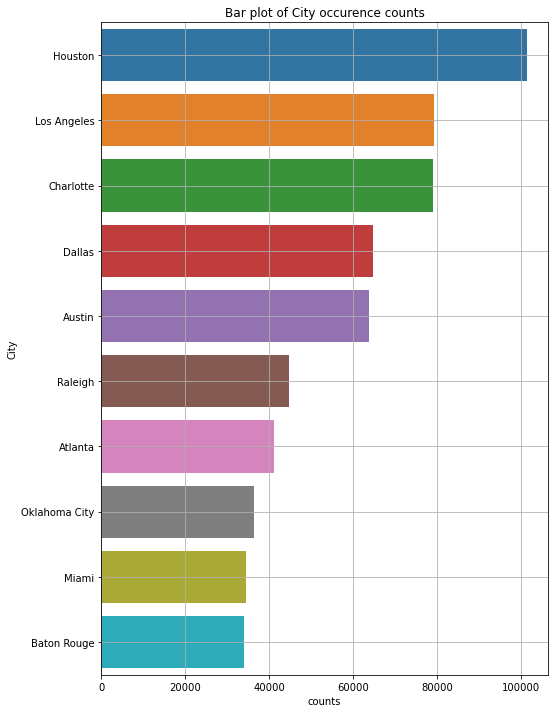

In [89]:
_ = (
    df["City"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "City", "City": "counts"})
).head(10)

plt.figure(figsize=[8, 12])
plt.title(f"Bar plot of City occurence counts")
ax = sns.barplot(y="City", x="counts", data=_,)
plt.grid()
plt.show()

1. Houston tops in number of reports of accidents (≈100K)
1. followed by Los Angeles and Charlotte (≈80K)

In [92]:
print(f"""There are {df["County"].nunique()} unique counties in the dataset""")

There are 1724 unique counties in the dataset


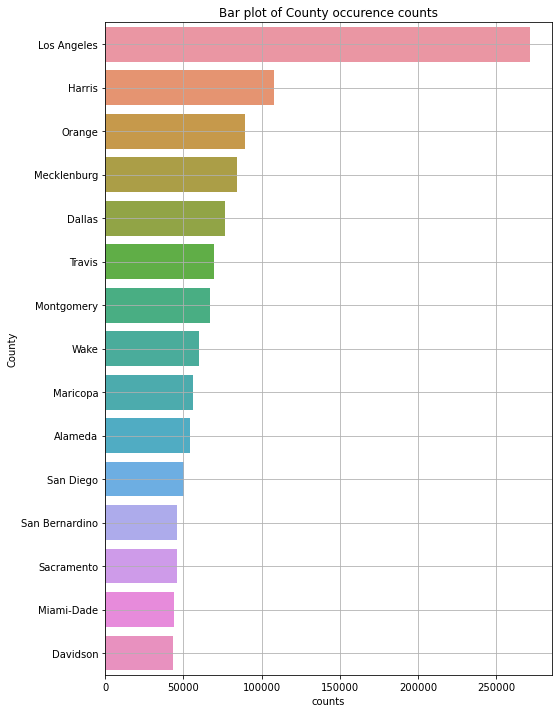

In [94]:
_ = (
    df["County"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "County", "County": "counts"})
).head(15)

plt.figure(figsize=[8, 12])
plt.title(f"Bar plot of County occurence counts")
ax = sns.barplot(y="County", x="counts", data=_,)
plt.grid()
plt.show()

1. Los Angeles has >250K accident reports in the dataset
1. Followed by Harris and Orange around 100K reports

## State

In [99]:
print(f"""There are {df['State'].nunique()} unique states in the dataset""")

There are 49 unique states in the dataset


In [100]:
# top 10 states with accident reports
df["State"].value_counts().head(10)

CA    816825
TX    329284
FL    258002
SC    173277
NC    165958
NY    160817
PA    106787
IL     99692
VA     96075
MI     95983
Name: State, dtype: int64

1. California, Texas, Florida are top 3 states with number of accidents in that order

## Country

In [107]:
print(
    f"""There is only {df["Country"].nunique()} unique country ({df["Country"].unique()[0]}) in the dataset"""
)

There is only 1 unique country (US) in the dataset


## Temperature

Dataset has values in Fahranheit converting to Celcius to better interpretation

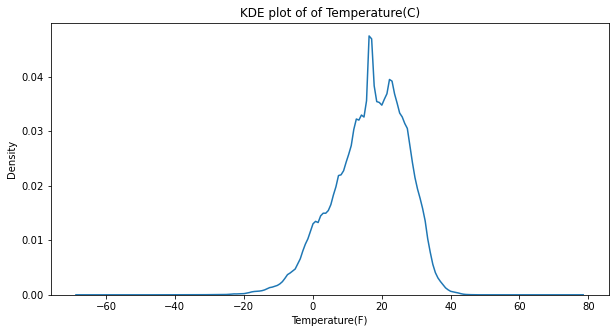

In [ ]:
_ = (df["Temperature(F)"] - 32) / 1.8

plt.figure(figsize=[10, 5])
plt.title("KDE plot of of Temperature(C)")
sns.kdeplot(_)
plt.grid()
plt.show()

1. Majority of accidents occur around 20 degree Celcius
1. There are few occurences of accidents during extreme temperatures < -20 degree Celcius and > 40 degree Celcius
1. This might be due to the reason that people likely might not be travelling during such extreme conditions

## Humidity(%)

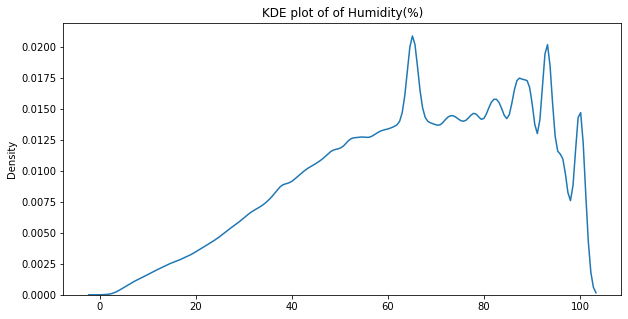

In [137]:
_ = df["Humidity(%)"].values

plt.figure(figsize=[10, 5])
plt.title("KDE plot of of Humidity(%)")
sns.kdeplot(_)
plt.grid()
plt.show()

1. Majority of accidents occur in the interval 60-90 % Humidity

## Pressure(in)

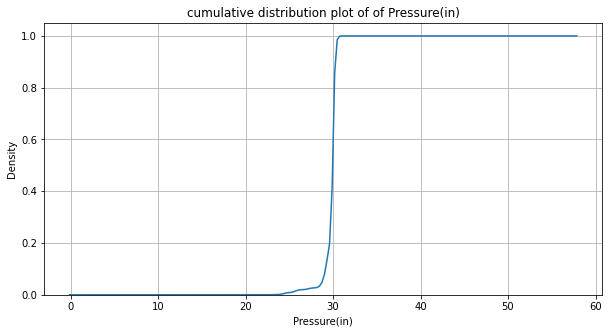

In [144]:
_ = df["Pressure(in)"]

plt.figure(figsize=[10, 5])
plt.title("cumulative distribution plot of of Pressure(in)")
sns.kdeplot(_, cumulative=True)
plt.grid()
plt.show()

1. More than 90% of the accidents happen when pressure is greater than 25 inches

## Visibility(mi)

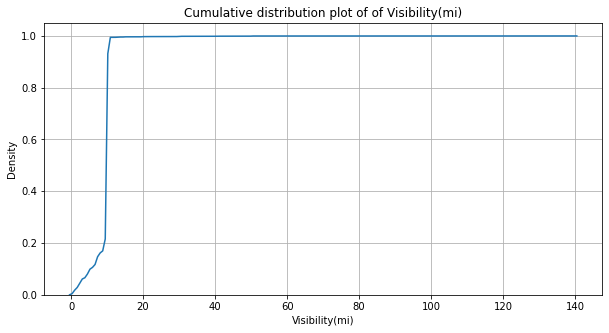

In [145]:
_ = df["Visibility(mi)"]

plt.figure(figsize=[10, 5])
plt.title("Cumulative distribution plot of of Visibility(mi)")
sns.kdeplot(_, cumulative=True)
plt.grid()
plt.show()

1. Only 20% of accidents happen when visibility is between 0-10 miles
1. Rest 80% of accidents happen when visibility is >10 miles

## Wind_Direction

In [147]:
df["Wind_Direction"].value_counts()

Calm        368282
CALM        217424
SSW         181645
South       177225
WNW         174115
SW          172252
WSW         165738
NW          164928
West        164624
SSE         163649
North       153252
NNW         147047
SE          132051
NNE         117475
NE          115931
ESE         114855
Variable    113897
ENE         112626
S           103970
East        103462
W            95115
N            70516
VAR          64523
E            60141
none         58874
Name: Wind_Direction, dtype: int64

1. Most accidents occur when wind direction is calm

`NOTE`
1. We can see that Calm and CALM are 2 different entities for the same meaning
    1. we can include this in cleaning step
    1. similarly for Variable and VAR

## Wind_Speed(mph)

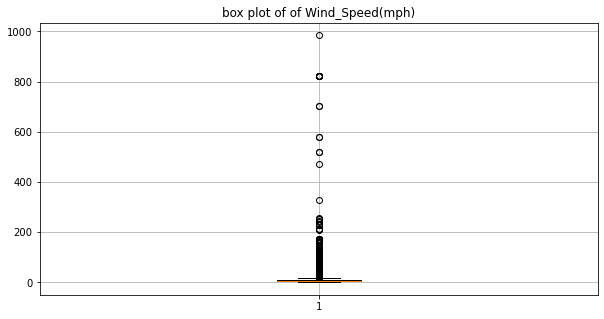

In [157]:
_ = df["Wind_Speed(mph)"]

plt.figure(figsize=[10, 5])
plt.title("box plot of of Wind_Speed(mph)")
plt.boxplot(_)
plt.grid()
plt.show()

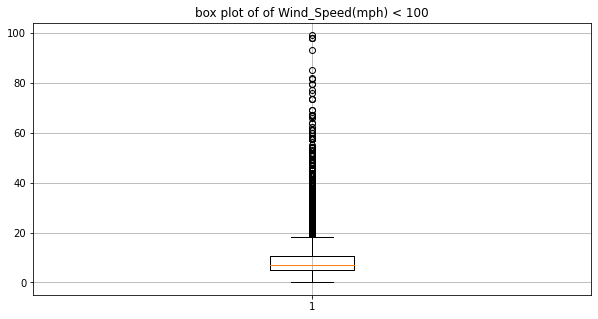

In [159]:
_ = df["Wind_Speed(mph)"][df["Wind_Speed(mph)"] < 100]

plt.figure(figsize=[10, 5])
plt.title("box plot of of Wind_Speed(mph) < 100")
plt.boxplot(_)
plt.grid()
plt.show()

1. in EDA_part1 we had imputed this column with median (around 12% of data was missing)
1. this is a long tail distribution and median is around 10

## Weather_Condition

In [163]:
"Weather_Condition"

print(
    f"""number of unique weather conditions in dataset :  {df["Weather_Condition"].nunique()}"""
)

number of unique weather conditions in dataset :  127


In [166]:
df["Weather_Condition"].value_counts().head(10)

Clear               827062
Fair                560320
Mostly Cloudy       499631
Overcast            391480
Partly Cloudy       353023
Cloudy              217883
Scattered Clouds    209374
Light Rain          181024
Light Snow           51582
Rain                 43007
Name: Weather_Condition, dtype: int64

1. Majority of the accidents occur when weather is 
    - clear
    - cloudy
    - close to rainy conditions

## POI variables

```python
['Amenity', 'Bump', 'Crossing',
'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',]
```

In [12]:
poi_list = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]
df[poi_list].apply(lambda x: x.value_counts()).T.fillna(0).astype(int)

,False,True
Amenity,3471535,42082
Bump,3513011,606
Crossing,3239091,274526
Give_Way,3504053,9564
Junction,3229168,284449
No_Exit,3509233,4384
Railway,3482442,31175
Roundabout,3513433,184
Station,3443296,70321
Stop,3461641,51976


1. Outputs of the above table are self explanatory

## Time of day

```python
['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
```

,Sunrise_Sunset,counts
0,Day,2593872
1,Night,919745


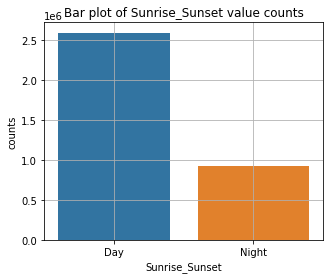

,Civil_Twilight,counts
0,Day,2768036
1,Night,745581


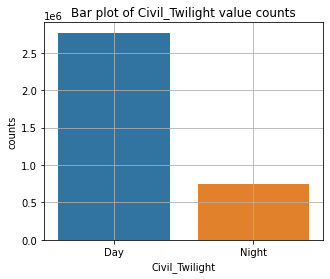

,Nautical_Twilight,counts
0,Day,2943513
1,Night,570104


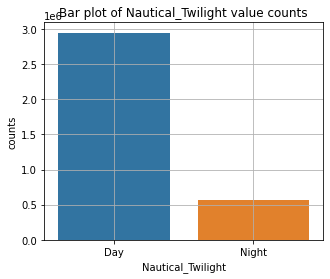

,Astronomical_Twilight,counts
0,Day,3075116
1,Night,438501


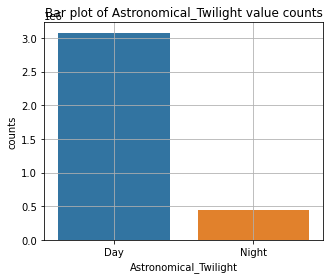

In [31]:
tod = [
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for var in tod:
    df_temp = (
        df[var]
        .value_counts()
        .reset_index()
        .rename(columns={"index": var, var: "counts"})
    )
    display(df_temp)
    plt.figure(figsize=[5, 4])
    plt.title(f"Bar plot of {var} value counts")
    ax = sns.barplot(x=var, y="counts", data=df_temp,)
    plt.grid()
    plt.show()
    print("\n\n")

1. From above bar plots we can see `Day` accidents in occur more than `Night`

## Zipcode

In [36]:
print(f"""number of unique zip codes {df["Zipcode"].nunique()}""")

number of unique zip codes 418780


## Airport_Code

In [37]:
print(f"""number of unique airport codes {df["Airport_Code"].nunique()}""")

number of unique airport codes 2001


## Timezone

In [39]:
print(f"""number of unique timezones {df["Timezone"].nunique()}""")

number of unique timezones 4


In [40]:
df["Timezone"].unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

## Description

In [41]:
df["Description"]

0          Right lane blocked due to accident on I-70 Eas...
1          Accident on Brice Rd at Tussing Rd. Expect del...
2          Accident on OH-32 State Route 32 Westbound at ...
3          Accident on I-75 Southbound at Exits 52 52B US...
4          Accident on McEwen Rd at OH-725 Miamisburg Cen...
                                 ...                        
3513612                             At Market St - Accident.
3513613      At Camino Del Rio/Mission Center Rd - Accident.
3513614    At Glassell St/Grand Ave - Accident. in the ri...
3513615       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
3513616                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 3513617, dtype: object

In [50]:
text = "|".join(np.hstack(df["Description"].values))

# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(text)

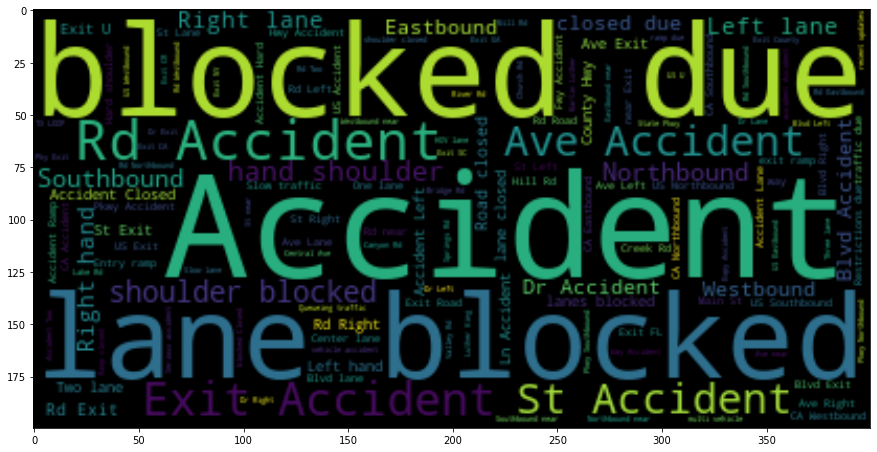

In [54]:
# Display the generated image
plt.figure(figsize=[15, 8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

1. some of the key terms in Description can be seen in above word cloud
1. Occurence of these key words could work as features

---

Variables skipped in EDA

```
# 
"Start_Time",
"End_Time",

#
"Start_Lat",
"Start_Lng",

# Nan% too high
"Wind_Chill(F)",
"Precipitation(in)",

# 
"Number",
"Street",
"Side",
"Weather_Timestamp",
```